In [1]:
import pandas as pd

data = pd.read_csv('water_potability.csv')

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
X = data.drop('Potability',axis=1)
y = data['Potability']
print(X.shape)
print(y)


(3276, 9)
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [3]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer()
X_impute = pd.DataFrame(impute.fit_transform(X))

# imputation removed columns. so put them back
X_impute.columns = X.columns
X= X_impute


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


                                    KNN CLASSIFIER

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

pred = knn.predict(X_train)

print("Training set score:{:.2f}".format(knn.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(knn.score(X_test,y_test)*100))

Training set score:61.70
Testing set score:61.66


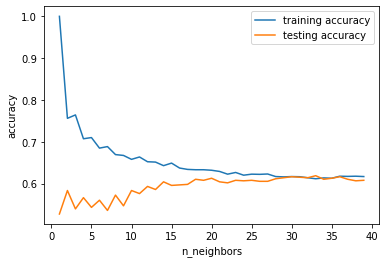

In [6]:
import matplotlib.pyplot as plt
training_accuracy = []
testing_accuracy  = []

neighbors_settings = range(1,40)


for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    testing_accuracy.append(knn.score(X_test,y_test))
    
#print("training accuracy of the model".format(training_accuracy))

#print("Tesing accuracy of the model:\n{}".format(testing_accuracy))
    

plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,testing_accuracy,label = "testing accuracy")

plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Feature: 0, score: 0.000
Feature: 1, score: -0.001
Feature: 2, score: 0.024
Feature: 3, score: -0.000
Feature: 4, score: -0.000
Feature: 5, score: -0.000
Feature: 6, score: 0.000
Feature: 7, score: -0.001
Feature: 8, score: 0.000


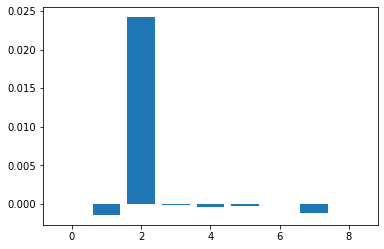

In [7]:
#FEATURE IMPORTANCES

from sklearn.inspection import permutation_importance

knn.fit(X,y)

results = permutation_importance(knn,X,y,scoring="accuracy") # performs permutation importances
imp = results.importances_mean  # get importances

for i,v in enumerate(imp):
    print("Feature: %0d, score: %.3f"%(i,v))
    
plt.bar([X for X in range(len(imp))],imp)
plt.show()

                                        RANDOM FOREST

In [8]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=42,max_depth=3,n_jobs=-1)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_train)

print("Training set score:{:.2f}".format(rfc.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(rfc.score(X_test,y_test)*100))


Training set score:64.35
Testing set score:63.74


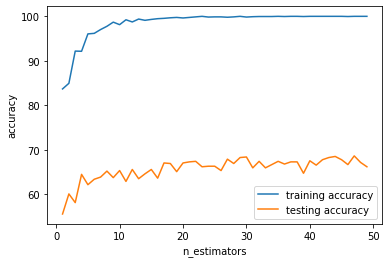

In [9]:
training_accuracy = []
testing_accuracy = []

estimators_settings = range(1,50)

for n_estimators in estimators_settings:
    rfc = RandomForestClassifier(n_estimators)
    rfc.fit(X_train,y_train)
    training_accuracy.append(rfc.score(X_train,y_train)*100)
    testing_accuracy.append(rfc.score(X_test,y_test)*100)
    
plt.plot(estimators_settings,training_accuracy,label="training accuracy")
plt.plot(estimators_settings,testing_accuracy,label="testing accuracy")

plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
    

Feature:0 , score: 0.12
Feature:1 , score: 0.12
Feature:2 , score: 0.12
Feature:3 , score: 0.12
Feature:4 , score: 0.13
Feature:5 , score: 0.10
Feature:6 , score: 0.10
Feature:7 , score: 0.10
Feature:8 , score: 0.10


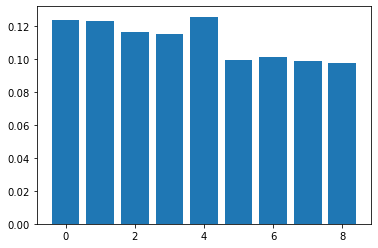

In [10]:
rfc.fit(X,y)

imp = rfc.feature_importances_

for i,v in enumerate(imp):
    print("Feature:%0d , score: %.2f"%(i,v))

plt.bar([X for X in range(len(imp))],imp)
plt.show()

                                GRADIENT BOOSTER REGRESSION

In [28]:
# Gradient Booster Regression
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)

gbrt.fit(X_train,y_train)

print("Training set score:{:.2f}".format(gbrt.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(gbrt.score(X_test,y_test)*100))




Training set score:72.89
Testing set score:60.32


                                LOGISTIC REGRESSION

In [12]:
# logistic regression

# implementation with all the features

from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression().fit(X_train,y_train)

pred = lreg.predict(X_train)

print("Training set score:{:.2f}".format(lreg.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(lreg.score(X_test,y_test)*100))

lreg10 = LogisticRegression(C=10).fit(X_train,y_train)

print("\nTraining set score with C=10:\n{:.2f}".format(lreg10.score(X_train,y_train)*100))
print("Testing set score with C=10:\n{:.2f}".format(lreg10.score(X_test,y_test)*100))


lreg100 = LogisticRegression(C=100).fit(X_train,y_train)

print("\nTraining set score with C=100:\n{:.2f}".format(lreg100.score(X_train,y_train)*100))
print("Testing set score with C=100:\n{:.2f}".format(lreg100.score(X_test,y_test)*100))



lreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)



print("\nTraining set score with C=0.01:\n{:.2f}".format(lreg001.score(X_train,y_train)*100))
print("Testing set score with C=0.01:\n{:.2f}".format(lreg001.score(X_test,y_test)*100))


Training set score:60.56
Testing set score:62.27

Training set score with C=10:
60.56
Testing set score with C=10:
62.27

Training set score with C=100:
60.56
Testing set score with C=100:
62.27

Training set score with C=0.01:
60.56
Testing set score with C=0.01:
62.27


Feature: 0, Score: 0.00005
Feature: 1, Score: -0.00072
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00833
Feature: 4, Score: -0.00073
Feature: 5, Score: -0.00016
Feature: 6, Score: -0.02006
Feature: 7, Score: 0.00095
Feature: 8, Score: 0.00002


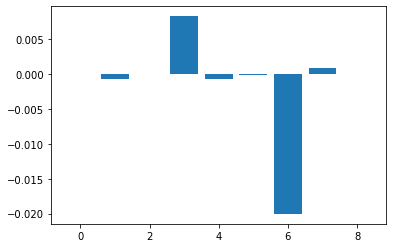

In [13]:
lreg.fit(X,y)
importance = lreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [14]:
# since feature 6 i.e, organic_carbon is triggering a huge loss we will eliminate that feature

X1 = X.drop('Organic_carbon',axis=1)
X1


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,31.997993,4.075075
...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,77.488213,4.708658


In [15]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,random_state=0)

lreg0 = LogisticRegression().fit(X1_train,y_train)

print("training score after removing feature 6:\n{:.2f}".format(lreg0.score(X1_train,y_train)*100))

print("testing score after removing feature 6:\n{:.2f}".format(lreg0.score(X1_test,y_test)*100))

training score after removing feature 6:
60.97
testing score after removing feature 6:
61.17


Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00103
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00012
Feature: 4, Score: -0.00095
Feature: 5, Score: -0.00024
Feature: 6, Score: 0.00023
Feature: 7, Score: -0.00001


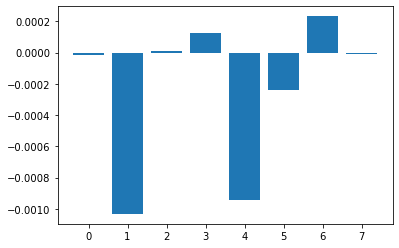

In [16]:
lreg.fit(X1,y)
importance = lreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
X2 = X1.drop('Hardness',axis=1)
X2
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,random_state=0)

lreg1 = LogisticRegression().fit(X2_train,y_train)

print("training score after removing feature 6 & 1:\n{:.2f}".format(lreg1.score(X2_train,y_train)*100))

print("testing score after removing feature 6 & 1:\n{:.2f}".format(lreg1.score(X2_test,y_test)*100))

training score after removing feature 6 & 1:
60.97
testing score after removing feature 6 & 1:
61.29


AttributeError: module 'seaborn' has no attribute 'load_X'